In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(ggfittext)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggfittext’ was built under R version 4.3.2”


In [2]:
dir_fig = 'R_trans/for_publish/'

In [3]:
file_main <- 'test.tsv'
df_main <- read.table(file_main, header = TRUE, sep = "\t")
print(dim(df_main))
df_main

[1] 344736    451


CHROM,POS,END,ID,SVTYPE,PLATFORM,SVLEN,SRC,GENCODE,denovo_LR,⋯,X_LOF_DEV_BR_10_cds,X_LOF_DEV_BR_20_cds,X_LOF_DEV_BR_30_cds,X_LOF_DEV_BR_40_cds,X_LOF_DEV_BR_50_cds,X_PLIp9_LOF_DEV_BR_10_cds,X_PLIp9_DEV_BR_GENE_10,X_PLIp9_DEV_BR_GENE_10_cds,X_PLIp9_DEV_BR_GENE_10_utr,X_PLIp9_DEV_BR_GENE_10_intron
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1,10000,180998,14346589,DUP,LR,170998,Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,10468,180108,Sniffles2.DEL.1DM0,DEL,LR,-169640,Sniffles_Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,14848,182483,14346592,DUP,LR,167635,Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,32024,32024,Sniffles2.INS.1M0,INS,LR,64,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,35141,35141,948107_1,BND,LR,24860,Lumpy,exon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,50938,51054,Sniffles2.DEL.33M0,DEL,LR,-116,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,59608,59608,Sniffles2.INS.2M0,INS,LR,318,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,67898,68334,Sniffles2.DEL.38M0,DEL,LR,-436,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,77175,77175,Sniffles2.INS.17M0,INS,LR,57,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
### clean features
fts = c('PLIp9_LOF_DEV_BR_10_cds',
        'LOF_DEV_BR_10_cds',
        'LOF_PLIp9_cds', 
        'LOF_LOWPLI_cds',
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        #'EV_CONS_EL_FRAC_10_cds',
        'S_HET_10_cds',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        #'EV_CONS_EL_FRAC_10_utr',
        'S_HET_10_utr',
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        #'EV_CONS_EL_FRAC_10_ncd',
        'S_HET_10_intron',
        'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c('LOF dev. brain pLI≥.9 genes, CDS', 
               'LOF dev. brain genes, CDS', 
               'LOF pLI≥.9, CDS', 
               'LOF pLI≤.9, CDS',
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               #'Evol. Consv. frc≥.1, CDS',
               'S het≥0.01, CDS',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               #'Evol. Consv. frc≥.1, UTR',
               'S het≥0.01, UTR',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               #'Evol. Consv. frc≥.1, non-CD',
               'S het≥0.01, intron',
               'Gnocchi≥3', 'Gnocchi≥2')

In [5]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1] "======================================================="
[1] "SQ70_SAMPLES"
[1] 16430   451
[1] "X_PLIp9_LOF_DEV_BR_10_cds"
[1] "X_LOF_DEV_BR_10_cds"
[1] "X_LOF_PLIp9_cds"
[1] "X_LOF_LOWPLI_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_cds"
[1] "X_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_cds"
[1] "X_LOWPLI_cds"
[1] "X_S_HET_10_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_utr"
[1] "X_LOWPLI_utr"
[1] "X_S_HET_10_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_S_HET_10_intron"
[1] "X_GNOCCHI_MAX_3"
[1] "X_GNOCCHI_MAX_2"
[1] "ORs:"
 [1] 1.6000000 1.1796296 1.9740260 1.0228526 1.9871795 1.1742424 2.3829787
 [8] 1.0485224 1.5927131 0.7411765 1.2000000 1.0645161 1.7971014 1.3850267
[15] 1.0244358 0.9797810 0.9774265 1.0018831 1.0336785 1.1866530 1.1545959
[1] "pvals:"
 [1] 0.67745567 0.78218252 0.18226255 0.96969029 0.36237121 0.74668891
 [7] 0.04772771 0.82196239 0.11471390 0.83735912 0.87151083 1.00000

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


[1] "R_trans/for_publish/devBrain_SQ70_SAMPLES.png"


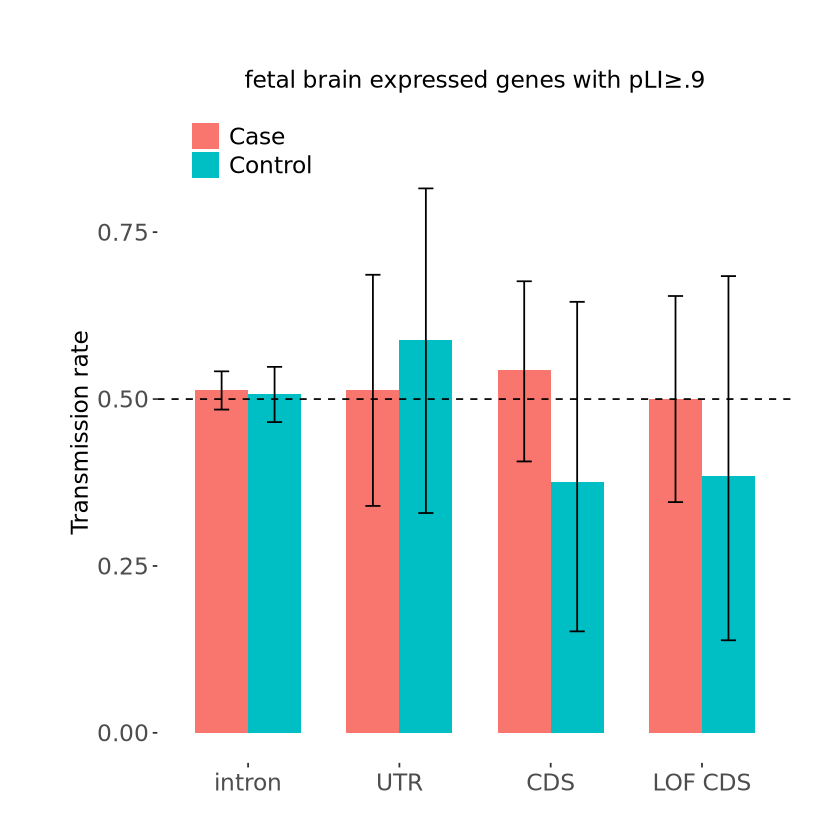

[1] "R_trans/for_publish/PLI_SQ70_SAMPLES.png"


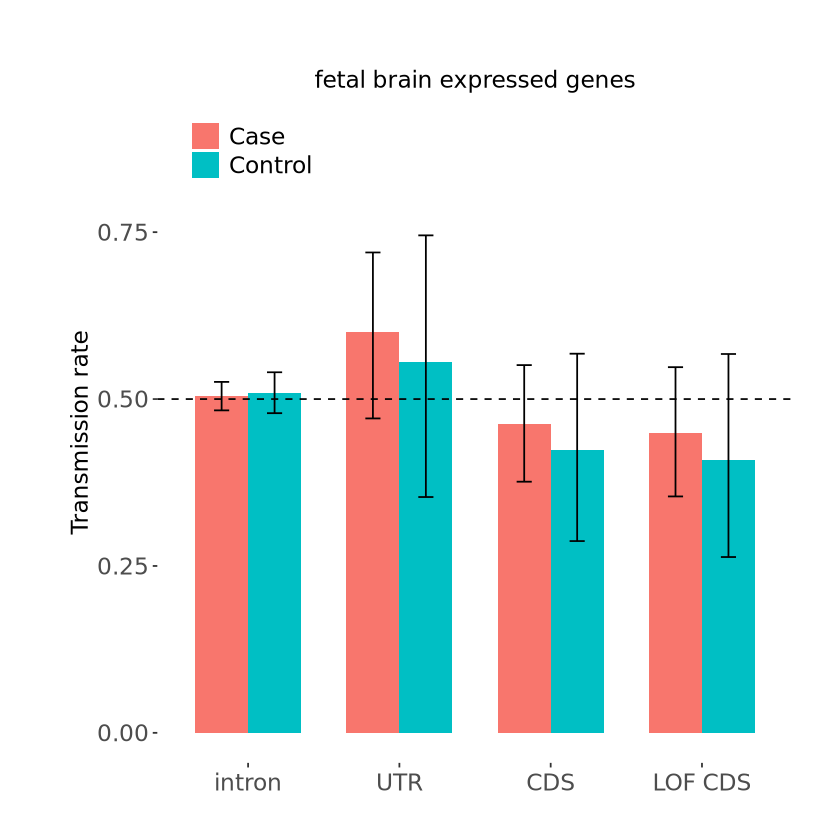

[1] "R_trans/for_publish/LOWPLI_SQ70_SAMPLES.png"


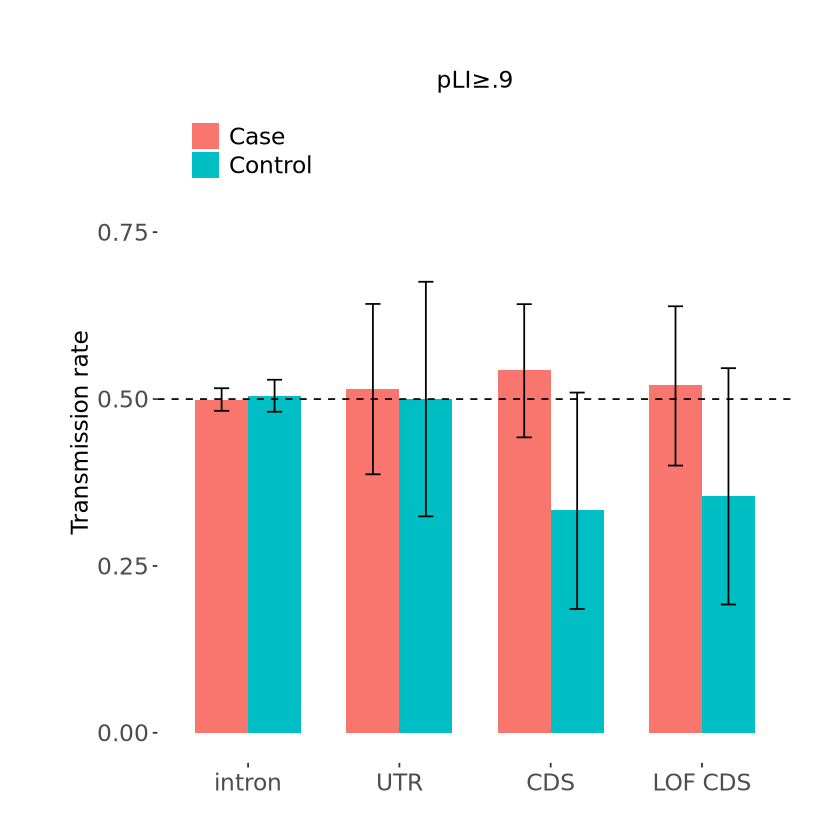

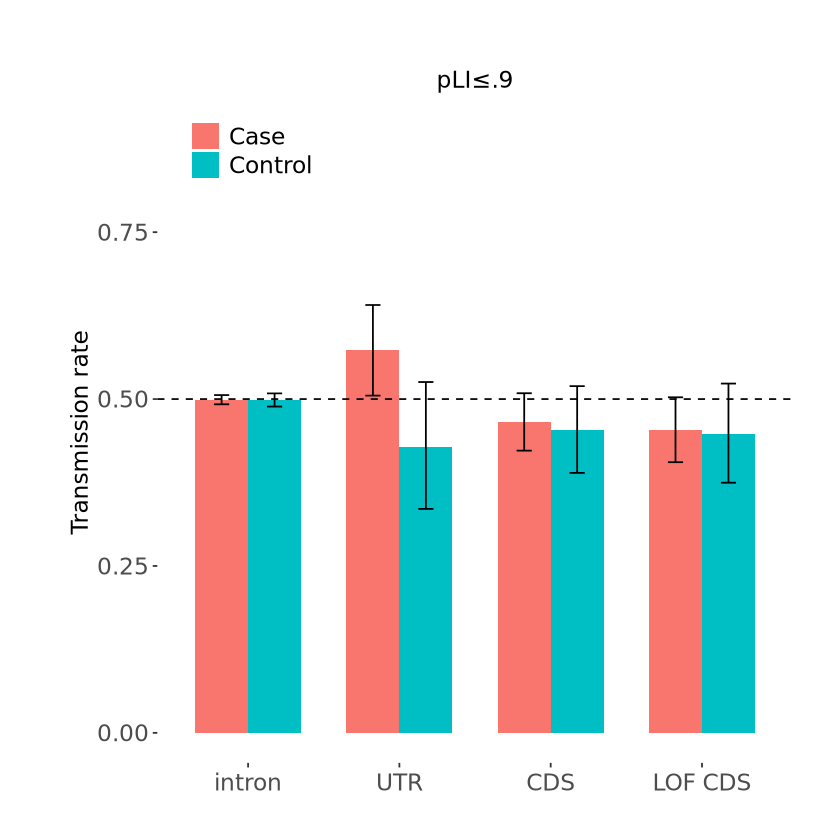

In [6]:
IS_CLEAN=TRUE
#IS_CLEAN=FALSE

#EXCLUDE_LR_ONLY=TRUE
EXCLUDE_LR_ONLY=FALSE

include_svtypes = c('INS', 'DEL', 'DUP', 'INV', '.')
freq_col = 'AD2_SAMPLES'
flt_freq = .05

############################# all
flt_names = c('SQ20_SAMPLES', 'SQ30_SAMPLES', 'SQ40_SAMPLES', 'SQ50_SAMPLES', 'SQ60_SAMPLES', 'SQ70_SAMPLES')

#for (i_flt in 1:1) {
#for (i_flt in 1:length(flt_names)) {
for (i_flt in 6:6) {
    flt_name = flt_names[i_flt]
    print('=======================================================')
    par_qual = flt_name
    #fig_name_chisq = paste(dir_fig, "trans_chisq_", flt_name, "_freq", flt_freq, "_clean", ".png", sep='')
    #fig_name_binom = paste(dir_fig, "trans_binomial_", flt_name, "_freq", flt_freq, "_clean", ".png", sep='')
    df_flt <- df_main %>%
    filter(SVTYPE %in% include_svtypes) %>%
    #filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
    filter(!!as.symbol(paste('freq_', freq_col, sep="")) <= flt_freq) %>%
    filter((SD_ART != 1) | PLATFORM != "LR") %>%
    filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))

    if (EXCLUDE_LR_ONLY) {
        df_flt <- df_flt %>%
        filter(PLATFORM %in% c("IL", "LR_IL"))
        suff = '_fltLR'
    }
    else {
        suff = ''
    }

    print(flt_name)
    print(dim(df_flt))

    print_stuff = F

    ORs = c()
    pvals = c()
    tr_cases = c()
    ntr_cases = c()
    tr_cons = c()
    ntr_cons = c()
    pval.bin.cases = c()
    pval.bin.controls = c()
    lb.bin.cases = c()
    lb.bin.controls = c()
    ub.bin.cases = c()
    ub.bin.controls = c()
    tr.rate.cases = c()
    tr.rate.controls = c()
    #for (ft in fts[c(11:11)]) {
    for (ft in fts) {
        var = paste('X_', ft, sep="")
        print(var)
    
        df_w = df_flt[df_flt[paste('X_', ft, sep="")] == 1,]
        #print(dim(df_w))
        #print('SVs intersecting:', ft, dim(df_w))
    
        tran_case = sum(df_w[paste('NUM_tran_case_', par_qual, sep="")])
        tran_control = sum(df_w[paste('NUM_tran_control_', par_qual, sep="")])
        nontran_case = sum(df_w[paste('NUM_nontran_case_', par_qual, sep="")])
        nontran_control = sum(df_w[paste('NUM_nontran_control_', par_qual, sep="")])
        if (print_stuff) {
            cat('tran_case:', tran_case, '\n')
            cat('tran_control:', tran_control, '\n')
            cat('nontran_case:', nontran_case, '\n')
            cat('nontran_control:', nontran_control, '\n')
        }
    
        tr_cases = c(tr_cases, tran_case)
        ntr_cases = c(ntr_cases, nontran_case)
        tr_cons = c(tr_cons, tran_control)
        ntr_cons = c(ntr_cons, nontran_control)
        
        OR = (tran_case / tran_control) / (nontran_case / nontran_control)
        ORs = c(ORs, OR)
        ctable = matrix(c(tran_case, nontran_case, tran_control, nontran_control), nrow=2, byrow=TRUE)
        rownames(ctable) <- c("Case", "Control")
        colnames(ctable) <- c("Tran", "non-Tran")
    
        chi_sq_test <- chisq.test(ctable)
        pval = chi_sq_test$p.value
        pvals = c(pvals, pval)
        if (print_stuff) {
            print(ctable)
            print(chi_sq_test)
            #print(str(chi_sq_test))
            print('pval:')
            print(pval)
        }

        p = .5
        if (tran_case+nontran_case > 0) {
            #binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "greater")
            binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "two.sided")
            pval.bin.case = binom.result.case$p.value
            lb.bin.case = binom.result.case$conf.int[1]
            ub.bin.case = binom.result.case$conf.int[2]
            tr.rate.case = unname(binom.result.case$estimate)[1]
            pval.bin.cases = c(pval.bin.cases, pval.bin.case)
            lb.bin.cases = c(lb.bin.cases, lb.bin.case)
            ub.bin.cases = c(ub.bin.cases, ub.bin.case)
            tr.rate.cases = c(tr.rate.cases, tr.rate.case)
        }
        else {
        binom.result.case <- NULL
            pval.bin.case = NaN
            lb.bin.case = NaN
            ub.bin.case = NaN
            tr.rate.case = NaN
            pval.bin.cases = c(pval.bin.cases, pval.bin.case)
            lb.bin.cases = c(lb.bin.cases, lb.bin.case)
            ub.bin.cases = c(ub.bin.cases, ub.bin.case)
            tr.rate.cases = c(tr.rate.cases, tr.rate.case)
        }
        if (tran_control+nontran_control > 0) {
            #binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "less")
            binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "two.sided")
            pval.bin.control = binom.result.control$p.value
            lb.bin.control = binom.result.control$conf.int[1]
        ub.bin.control = binom.result.control$conf.int[2]
            tr.rate.control = unname(binom.result.control$estimate)[1]
            pval.bin.controls = c(pval.bin.controls, pval.bin.control)
            lb.bin.controls = c(lb.bin.controls, lb.bin.control)
            ub.bin.controls = c(ub.bin.controls, ub.bin.control)
            tr.rate.controls = c(tr.rate.controls, tr.rate.control)
        }
        else {
            binom.result.control <- NULL
            pval.bin.control = NaN
            lb.bin.control = NaN
            ub.bin.control = NaN
            tr.rate.control = NaN
            pval.bin.controls = c(pval.bin.controls, pval.bin.control)
            lb.bin.controls = c(lb.bin.controls, lb.bin.control)
            ub.bin.controls = c(ub.bin.controls, ub.bin.control)
            tr.rate.controls = c(tr.rate.controls, tr.rate.control)
        }
    
        if (print_stuff) {
            print(binom.result.case)
            print(binom.result.control)
            print('pval.bin.case:')
            print(pval.bin.case)
            print('pval.bin.control:')
            print(pval.bin.control)
            print('lb.bin.case:')
            print(lb.bin.case)
            print('ub.bin.case:')
            print(ub.bin.case)
            print('lb.bin.control:')
            print(lb.bin.control)
            print('ub.bin.control:')
            print(ub.bin.control)
            print('tr.rate.case:')
            print(tr.rate.case)
            print('tr.rate.control:')
            print(tr.rate.control)
            print(str(binom.result.case))
            print(str(binom.result.control))
        }
    }

    tr_case_ntr_case = paste(as.character(tr_cases), as.character(ntr_cases), sep='/')
    tr_con_ntr_con = paste(as.character(tr_cons), as.character(ntr_cons), sep='/')

    print('ORs:')
    print(ORs)
    print('pvals:')
    print(pvals)
    print('tr_case_ntr_case:')
    print(tr_case_ntr_case)
    print('tr_con_ntr_con:')
    print(tr_con_ntr_con)
    print('pval.bin.cases:')
    print(pval.bin.cases)
    print('pval.bin.controls:')
    print(pval.bin.controls)
    print('lb.bin.cases:')
    print(lb.bin.cases)
    print('lb.bin.controls:')
    print(lb.bin.controls)
    print('ub.bin.cases:')
    print(ub.bin.cases)
    print('ub.bin.controls:')
    print(ub.bin.controls)
    print('tr.rate.cases:')
    print(tr.rate.cases)
    print('tr.rate.controls:')
    print(tr.rate.controls)


    # make binomial test dataframe
    my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels,
                          'tr.rate.cases' = tr.rate.cases, 'tr.rate.controls' = tr.rate.controls, 
                          'lb.bin.cases' = lb.bin.cases, 'ub.bin.cases' = ub.bin.cases, 
                          'lb.bin.controls' = lb.bin.controls, 'ub.bin.controls' = ub.bin.controls, 
                          'pval.bin.cases' = pval.bin.cases, 'pval.bin.controls' = pval.bin.controls, 
                          'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)
    
    my_data.melt = melt(my_data, id.vars = c('fts', 'fts_labels', 'lb.bin.cases', 'ub.bin.cases', 
                                               'lb.bin.controls', 'ub.bin.controls', 'pval.bin.cases', 'pval.bin.controls', 
                                               'tr_case_ntr_case', 'tr_con_ntr_con'), 
                         variable.name = 'case_control', value.name = 'TR_rate')

    my_data.melt <- transform(my_data.melt, lb.bin = ifelse(case_control=='tr.rate.cases', lb.bin.cases, lb.bin.controls))
    my_data.melt <- transform(my_data.melt, ub.bin = ifelse(case_control=='tr.rate.cases', ub.bin.cases, ub.bin.controls))
    my_data.melt <- transform(my_data.melt, tr_ntr = ifelse(case_control=='tr.rate.cases', tr_case_ntr_case, tr_con_ntr_con))
    
    sig.cases <- sapply(my_data.melt$pval.bin.cases, get_pval_char)
    sig.controls <- sapply(my_data.melt$pval.bin.controls, get_pval_char)
    print(sig.cases)
    print(sig.controls)
    my_data.melt$sig.cases = sig.cases
    my_data.melt$sig.controls = sig.controls
    my_data.melt <- transform(my_data.melt, sig = ifelse(case_control=='tr.rate.cases', sig.cases, sig.controls))
    #(my_data.melt)




    sub_fts_labels = c('intron', 'UTR', 'CDS', 'LOF CDS')
    sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_LOF_DEV_BR_10_cds')
    title_1 = 'fetal brain expressed genes with pLI≥.9'
    fig_base_1 = 'devBrainPLI'
    sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_utr', 'DEV_BR_GENE_10_cds', 'LOF_DEV_BR_10_cds')
    title_2 = 'fetal brain expressed genes'
    fig_base_2 = 'devBrain'
    sub_fts_3 = c('PLIp9_intron', 'PLIp9_utr', 'PLIp9_cds', 'LOF_PLIp9_cds')
    title_3 = 'pLI≥.9'
    fig_base_3 = 'PLI'
    sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_utr', 'LOWPLI_cds', 'LOF_LOWPLI_cds')
    title_4 = 'pLI≤.9'
    fig_base_4 = 'LOWPLI'
    #sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

    sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4)
    title_list = list(title_1, title_2, title_3, title_4)
    fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4)

    for (i_plot in 1:length(sub_flts_list)) {
    #for (i_plot in 1:1) {
        sub_fts = sub_flts_list[[i_plot]]
        title = title_list[[i_plot]]
        fig_base = fig_base_list[[i_plot]]
        fig_name = paste0(dir_fig, fig_base, "_", flt_name, suff, ".png")

        my_data_sub = my_data.melt[my_data.melt$fts %in% sub_fts,]
        my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
        #print('subset df:')
        #print(my_data_sub)

        # plot binomial test results
        print(fig_name)
        y_sig = 3.5
        size_txt = 14
        size_sig = 4

        base <- ggplot(my_data_sub, aes(x = fts, y = TR_rate, fill = case_control, ymin=lb.bin , ymax=ub.bin, label=TR_rate)) +
          geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
          geom_hline(yintercept = .5, linetype = "dashed", color = "black") +
          geom_errorbar(position = position_dodge(width=0.7), aes(ymin = lb.bin, ymax = ub.bin), width = 0.2) +
          #geom_text(aes(label = sig), position=position_dodge(width=0.9), angle=90, hjust=1, vjust=0.5) +
          #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
          labs(y = "Transmission rate", title = title) +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 0, vjust = .5, hjust=0.5, size=size_txt),
                axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt),
                legend.position = c(0.15, 0.95),
                legend.text = element_text(size=size_txt),
                legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
          scale_fill_discrete(name = '', labels = c("Case", "Control")) +
          ylim(c(0, 0.9))
    
        print(base)
        
        ggsave(fig_name, width = 10, height = 6)
    }
    
}
###############################